<a href="https://colab.research.google.com/github/jasminejj08/Data-Science-Analyses/blob/main/DataScience_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Visualization in Data Science
### Please note that two different methods for the scatter plots correlation matrix have been provided

In [ ]:
#import the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.api import OLS
from sklearn.datasets import load_iris
import os.path
from google.colab import files

In [ ]:
#load dataset iris
iris_data = load_iris()

In [ ]:
#Read the dataset iris from sklearn and save it in a data frame. The following attributes should be part of
#the dataframe: Sepal Length, Sepal Width, Petal Length, Petal Width, Target.
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)

In [ ]:
#checking to make sure this is the correct dataset and all the needed attributes are present
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Create a new attribute (Flower) to identify the iris flower: Setosa, Versicolor or Virginica
#Update the 'Flower' attribute with the proper flower name. Look at the attribute Target for some insight
#about the flowers

#first we are defining a function based on the 'target' values of the dataframe
#to determine which flower there is
def f(x):
  if (x < 1):
    return 'Setosa'
  elif (x < 2):
    return 'Versicolor'
  else:
    return 'Virginica'

In [ ]:
#applying the function to the target column to create the values of the
#new attribute 'Flower' in the dataframe
df_iris['Flower'] = df_iris['target'].apply(f)

In [ ]:
#Display the first 5 entries of the dataframe
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [ ]:
#Display the frequency (count) of each flower
df_iris['Flower'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Flower, dtype: int64

In [ ]:
#looking at all the columns present in the dataframe and their names
print(df_iris.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'Flower'],
      dtype='object')


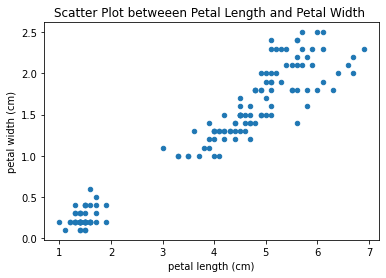

In [ ]:
#Display scatter plot between Petal Length and Petal Width
df_iris.plot(kind="scatter", x='petal length (cm)', y='petal width (cm)',
             title='Scatter Plot betweeen Petal Length and Petal Width ')

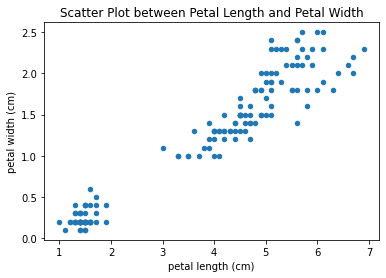

In [ ]:
#Another method to display scatter plot between Petal Length and Petal Width
df_iris[["petal length (cm)", "petal width (cm)"]].plot(kind="scatter", x='petal length (cm)',
              y='petal width (cm)', title='Scatter Plot between Petal Length and Petal Width')

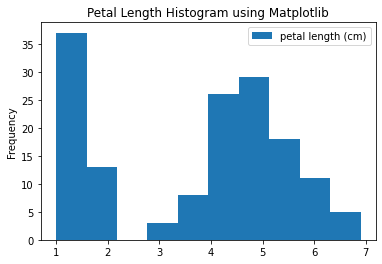

In [ ]:
#Display Histogram for Petal Length using the library matplotlib
df_iris[['petal length (cm)']].plot(kind="hist", title='Petal Length Histogram using Matplotlib')

[Text(0.5, 1.0, 'Histogram for Petal Width using Seaborn')]

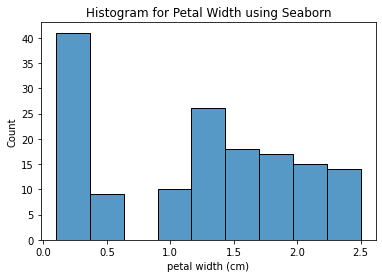

In [ ]:
#Display Histogram for Petal Width using the library seaborn
sns.histplot(data=df_iris, x='petal width (cm)').set(title='Histogram for Petal Width using Seaborn')

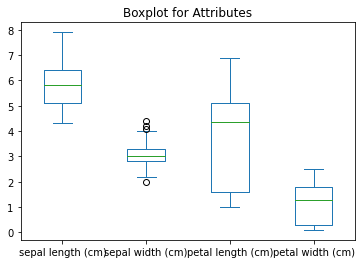

In [ ]:
#Display Boxplot for the attributes: Sepal Length, Sepal Width, Petal Length, and Petal Width.
#The graph should show the outliers (if any).
df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].plot(kind='box', title='Boxplot for Attributes')

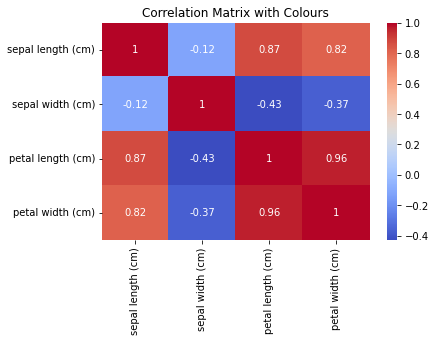

In [ ]:
#Create and display the correlation matrix with different colors for the attributes: Sepal Length,
#Sepal Width, Petal Length, and Petal Width. Set the precision to 3 digits.
dfcorr = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].corr().round(3)
sns.heatmap(dfcorr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Colours')
plt.show()

In [ ]:
#Another way to show the correlation matrix:
dfcorr = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].corr()
dfcorr.style.background_gradient(cmap='coolwarm').set_precision(3)

<ipython-input-193-ba65fba40c5d>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dfcorr.style.background_gradient(cmap='coolwarm').set_precision(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


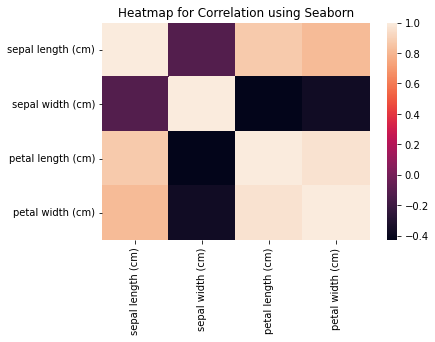

In [ ]:
#Create Heatmap for the correlation using the library seaborn.
heatmap = sns.heatmap(dfcorr)
plt.title('Heatmap for Correlation using Seaborn')
plt.show()

In [ ]:
#Create a simple Linear Regression Model to predict the Petal Width using the Petal Length.
petallength = df_iris[['petal length (cm)']] #get x-axis
petalwidth = df_iris['petal width (cm)'] #get y-axis
irisregress = LinearRegression().fit(petallength, petalwidth) #get the regession model

predicted = irisregress.predict(petallength) #predict the petal width data

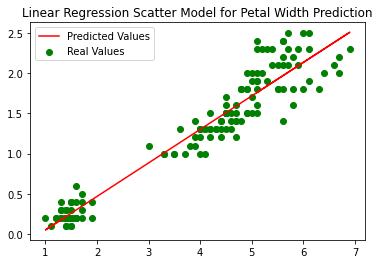

In [ ]:
#Display scatter plot showing the regression model
plt.scatter(petallength, petalwidth, color='g', label='Real Values')
plt.plot(petallength, predicted, color='r', label='Predicted Values')
plt.title('Linear Regression Scatter Model for Petal Width Prediction')
plt.legend()
plt.show()

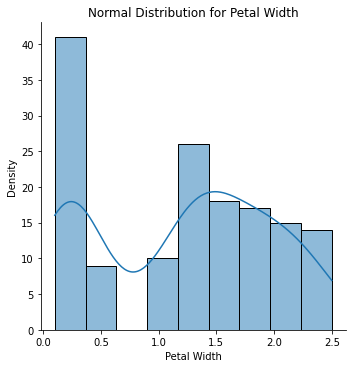

In [ ]:
#Display graph for the bell curve (normal distribution)
#the data chosen for this distribution is the petal width
sns.displot(df_iris['petal width (cm)'], kde=True) #add the bell curve with the distribution
plt.xlabel('Petal Width') #set the axis labels and title
plt.ylabel('Density')
plt.title('Normal Distribution for Petal Width')
plt.show() #display the curve